# Hierarchical Clustering

In [18]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
import numpy as np

from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

pyplot.rcParams["figure.figsize"] = (15,9)

In [19]:
sample, target_cluster = make_blobs(n_samples=150, n_features=2, centers=3, cluster_std=0.5, random_state=0)

In [20]:
def plot_clusters(sample, prediction, plot_centroids=False):
    x_centroids = []
    y_centroids = []
    
    for cluster in set(prediction):
        x = sample[(prediction == cluster),0]  # grab x coordinates of observations in that cluster
        y = sample[(prediction == cluster),1]  # grab y coordinates of observations in that cluster
        x_centroids.append(np.mean(x))
        y_centroids.append(np.mean(y))
        
        pyplot.scatter(x, y, s=50, marker="s", label=f"cluster {cluster}")  # plot coordinates for each cluster
    
    if plot_centroids:
        pyplot.scatter(x_centroids, y_centroids, marker="*", c="red", s=250, label="centroids")
    
    pyplot.legend()
    pyplot.grid()
    pyplot.show()

**Running hierarchical clustering algorithm**

In [5]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  affinity : str or callable, default='euclidean'
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed".
 |      If linkage is "ward", only "euclidean" is accepted.
 |    

In [21]:
ac = AgglomerativeClustering(affinity="euclidean", linkage="ward", n_clusters=3)

In [22]:
prediction = ac.fit_predict(sample)

In [23]:
prediction

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

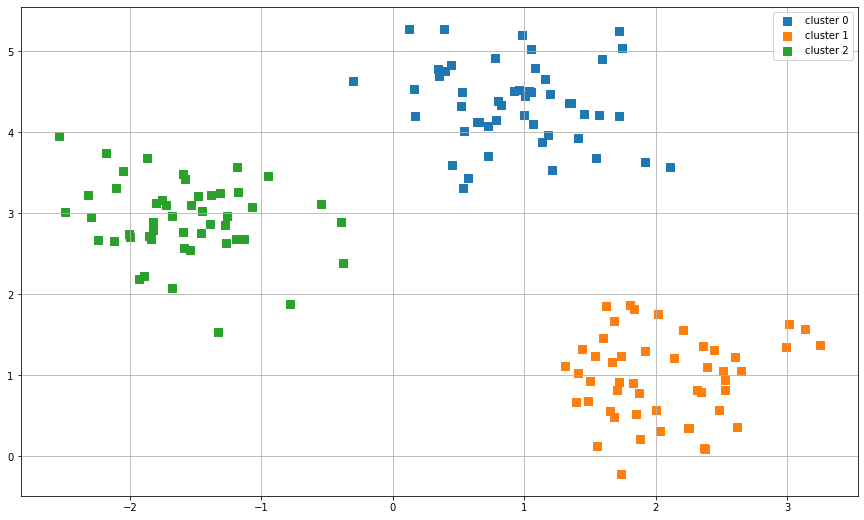

In [24]:
plot_clusters(sample, prediction)

### Making a dendrogram

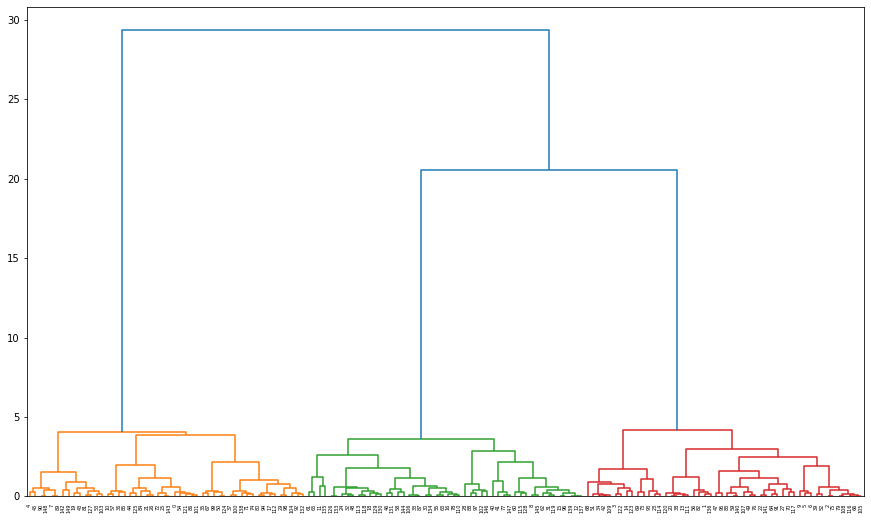

In [25]:
dendogram = sch.dendrogram(sch.linkage(sample, method="ward"))

pyplot.show()

In [26]:
type(dendogram)

dict

In [27]:
dendogram

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [90.0, 90.0, 120.0, 120.0],
  [70.0, 70.0, 105.0, 105.0],
  [25.0, 25.0, 87.5, 87.5],
  [145.0, 145.0, 155.0, 155.0],
  [165.0, 165.0, 175.0, 175.0],
  [150.0, 150.0, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [190.0, 190.0, 212.5, 212.5],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [265.0, 265.0, 283.75, 283.75],
  [242.5, 242.5, 274.375, 274.375],
  [201.25, 201.25, 258.4375, 258.4375],
  [160.0, 160.0, 229.84375, 229.84375],
  [315.0, 315.0, 325.0, 325.0],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.